In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_file='frozen_inference_graph.pb'


In [3]:
model = cv2.dnn_DetectionModel(frozen_file, config_file)

In [4]:
classlabels=[] # Empty list of Python
file_name = 'Labels.txt'
with open (file_name, 'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
print(len(classlabels))

80


In [7]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)


<dnn_Model 00000190876CD490>

## IMAGE OBJECT DETECTION 

In [8]:
img=cv2.imread('pexels-gaspar.jpg')


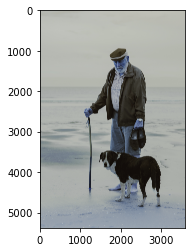

In [9]:
plt.imshow(img)

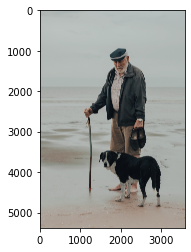

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
Classindex, confidence, bbox = model.detect(img, confThreshold=0.5)

In [12]:
print(Classindex)

[[ 1]
 [18]
 [18]
 [ 1]
 [18]]


In [13]:
for Classind, conf, boxes in zip(Classindex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (0, 0, 255), 5)
    cv2.putText(img, classlabels[Classind-1], (boxes[0]+10, boxes[1]+40), cv2.FONT_HERSHEY_PLAIN, fontScale=3, color=(0,255,0), thickness=5)

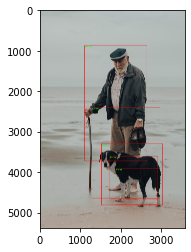

In [14]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGRA2RGB))

### RESULTS: HERE IN THE ABOVE PICTURE THE OBJECT AND THE PERSON DETECTED PERFECTLY

# # VIDEO OBJECT DETECTION

In [15]:
import cv2
cap = cv2.VideoCapture('pexels-joseph-a-eulo-5286836.mp4')

In [ ]:
# Now Check if the video is opened Correctly
cap = cv2.VideoCapture('pexels-joseph-a-eulo-5286836.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cannot open video cap')

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, (1200, 600), 0)
    Classindex, confidence, bbox = model.detect(frame, confThreshold=0.5)
    print(Classindex)
    if (len(Classindex)!=0):
        for Classind, conf, boxes in zip(Classindex.flatten(), confidence.flatten(), bbox):
            if Classind<=80:
                cv2.rectangle(frame, boxes, (255,0,0), 5)
                cv2.putText(frame, classlabels[Classind-1], (boxes[0]+10, boxes[1]+40), cv2.FONT_HERSHEY_PLAIN, fontScale=3, color=(0,255,0), thickness=4)
    cv2.imshow('Object Detection', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[ 1]
 [65]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
